## 特徵選取演算法

常見演算法：


Sequential Feature Selection(SFS)。循序加入最具影響力的特徵，直到特徵數達到要求的個數。

Recursive Feature Elimination (RFE) 。每次都移除最不重要的特徵

Permutation Feature Importance(PFI)。數據中某一特徵的值隨機打亂，其他特徵保持不變

# Sequential Feature Selection(SFS)

In [1]:
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [12]:
X, y = load_wine(return_X_y=True, as_frame=True)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.5, random_state=42)

In [26]:
X_train.shape

(89, 13)

## 特徵縮放

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 選擇演算法

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

## 模型訓練

In [17]:
clf.fit(X_train_std, y_train)

LogisticRegression()

In [18]:
clf.score(X_test_std, y_test)#精準度 (Accuracy)

0.9887640449438202

## 測試選取3個特徵的所有組合

In [47]:
from sklearn.feature_selection import SequentialFeatureSelector
knn = KNeighborsClassifier(n_neighbors=11)#使用最近鄰打分數
sfs = SequentialFeatureSelector(knn, n_features_to_select=6)#選三個
sfs.fit(X_train_std, y_train)
sfs.get_support()


array([ True, False, False, False,  True, False,  True, False, False,
        True,  True, False,  True])

In [48]:
columns_list = np.array(X.columns.to_list())
columns_list[sfs.get_support()]

array(['alcohol', 'magnesium', 'flavanoids', 'color_intensity', 'hue',
       'proline'], dtype='<U28')

In [49]:
sfs.get_feature_names_out(columns_list)

array(['alcohol', 'magnesium', 'flavanoids', 'color_intensity', 'hue',
       'proline'], dtype=object)

In [50]:
sfs.transform(X_train_std).shape #選取以上特徵

(89, 6)

## 選擇演算法

In [51]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

## 模型訓練

In [52]:
clf.fit(sfs.transform(X_train_std), y_train)

LogisticRegression()

## 模型評估

In [53]:
clf.score(sfs.transform(X_test_std), y_test)

0.9887640449438202

# Recursive Feature Elimination (RFE)

In [54]:
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [55]:
X, y = load_wine(return_X_y=True, as_frame=True)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.5, random_state=42)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [58]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [59]:
clf.fit(X_train_std, y_train)

LogisticRegression()

In [60]:
clf.score(X_test_std, y_test)

0.9887640449438202

## 測試選取3個特徵的所有組合

In [61]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# RFE 使用的評估演算法必須支援 coef_ or feature_importances_ 屬性，KNN 不適用
clf = LogisticRegression()
model = RFE(clf, n_features_to_select=3)
model.fit(X_train_std, y_train)
model.get_support()

array([False, False, False, False, False, False,  True, False, False,
        True, False, False,  True])

In [62]:
column_list = np.array(X.columns.to_list())
column_list[model.get_support()]

array(['flavanoids', 'color_intensity', 'proline'], dtype='<U28')

In [63]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [64]:
clf.fit(model.transform(X_train_std), y_train)

LogisticRegression()

In [65]:
clf.score(model.transform(X_test_std), y_test)

0.9662921348314607

# Permutation Feature Importance(PFI)

In [66]:
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [67]:
X, y = load_wine(return_X_y=True, as_frame=True)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.5, random_state=42)

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [70]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [71]:
clf.fit(X_train_std, y_train)

LogisticRegression()

In [72]:
clf.score(X_test_std, y_test)

0.9887640449438202

In [74]:

from sklearn.inspection import permutation_importance
clf = KNeighborsClassifier()
clf.fit(X_train_std, y_train)
#n_repeats 做10次
model = permutation_importance(clf, X_test_std, y_test, n_repeats=10)
#
#特徵重要性的平均數與標準差
#假設n_repeats=10 model.importances_mean表示做10次評估的平值
#model.importances_std 表示做10次評估的的變異性
model.importances_mean, model.importances_std

(array([ 0.0494382 ,  0.02359551,  0.02359551, -0.00337079,  0.00449438,
        -0.01685393,  0.00224719, -0.00674157,  0.        ,  0.04719101,
         0.01235955, -0.0011236 ,  0.05955056]),
 array([0.01251183, 0.01371523, 0.01173068, 0.00877556, 0.01825627,
        0.00905872, 0.01651341, 0.01145847, 0.01589004, 0.01866657,
        0.01059998, 0.01059998, 0.01949365]))

In [80]:
# 特徵選取名稱
column_list = np.array(X.columns.to_list())

column_selected = []
for i in model.importances_mean.argsort()[::-1]:
    #print(i)
    #標準差 在此表示每次計算特徵重要性的變化性 起伏的一個狀態 也可以說穩定性
    #特徵重要性平均數 - 2倍特徵重要性標準差 意思是 此特徵重要性平均 很穩定標準差不算大就算2倍標準差也沒超過
    #簡單來說就是2倍標準差沒超過平均數 算很穩定
    #另外表示特徵平均數是正的 表示正相關
    if model.importances_mean[i] - 2 * model.importances_std[i] > 0:
        print(f"{column_list[i]:20s} "
              f"{model.importances_mean[i]:.3f}"
              f" +/- {model.importances_std[i]:.3f}")
        column_selected.append(column_list[i])

proline              0.060 +/- 0.019
alcohol              0.049 +/- 0.013
color_intensity      0.047 +/- 0.019
ash                  0.024 +/- 0.012


In [81]:
X = X[column_selected]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.5, random_state=42)

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [84]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [85]:
clf.fit(X_train_std, y_train)

LogisticRegression()

In [86]:
clf.score(X_test_std, y_test)

0.9101123595505618

# Scikit-learn PCA 實作

In [87]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
ds = datasets.load_wine()
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
from sklearn.model_selection import train_test_split
# 指定X、Y
X = df.values
y = ds.target

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=2)
X_train_pca = pca1.fit_transform(X_train_std)
X_test_pca = pca1.transform(X_test_std)
X_train_pca.shape, X_test_pca.shape, pca1.explained_variance_ratio_
#array([0.36328559, 0.20188339])表示變異性

((142, 2), (36, 2), array([0.36328559, 0.20188339]))

In [92]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [93]:
clf.fit(X_train_pca, y_train)

LogisticRegression()

In [95]:
from sklearn.metrics import accuracy_score
# 計算準確率
y_pred = clf.predict(X_test_pca)
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

94.44%


# Scikit-learn LDA實作

In [96]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
ds = datasets.load_wine()
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 指定X、Y
X = df.values
y = ds.target

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 特徵萃取(LDA)

In [106]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

In [102]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [103]:
clf.fit(X_train_lda, y_train)

LogisticRegression()

In [104]:
# 計算準確率
y_pred = clf.predict(X_test_lda)
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

97.22%


# 簡單線性回歸導論

在這個非常簡單的例子中，我們將探討如何創建一條非常簡單的擬合線，典型的案例是 y=mx+b 形式。我們將仔細地逐步進行，讓您了解一條簡單的擬合線能回答什麼類型的問題。請記住，這個案例非常簡化，並不是我們稍後將採用的方法，它僅僅是為了讓您開始思考線性回歸，

簡單線性回歸的核心公式是找到最佳擬合直線，即所謂的回歸線，其公式可以表示為：

$ y = \beta_0 + \beta_1 x $

其中：
- $ y $ 是應變量（依賴變量）。
- $ x $ 是自變量（獨立變量）。
- $ \beta_0 $ 是截距，即直線在 $ y $ 軸的交點。
- $ \beta_1 $ 是斜率，表示 $ x $ 變動一單位時 $ y $ 的變動量。

### 參數估計
使用最小二乘法來估計 $ \beta_0 $ 和 $ \beta_1 $，計算公式如下：

$ \beta_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} $

$ \beta_0 = \bar{y} - \beta_1 \bar{x} $

其中：
- $ \bar{x} $ 和 $ \bar{y} $ 分別是 $ x $ 和 $ y $ 的平均值。
- $ n $ 是數據點的數量。


In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df = pd.read_csv("Advertising.csv")

In [109]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [110]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

<Axes: xlabel='total_spend', ylabel='sales'>

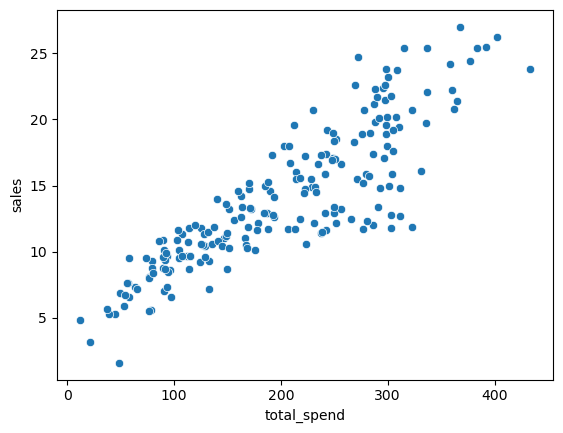

In [111]:
sns.scatterplot(x='total_spend',y='sales',data=df)

<Axes: xlabel='total_spend', ylabel='sales'>

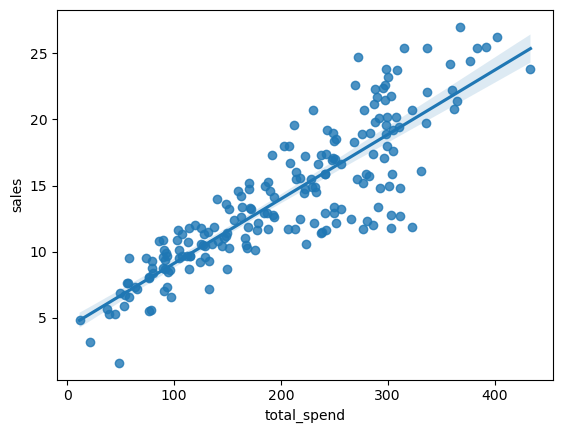

In [112]:
sns.regplot(x='total_spend',y='sales',data=df)

## 套用公式

回歸方程為：y = 4.24 + 0.05x


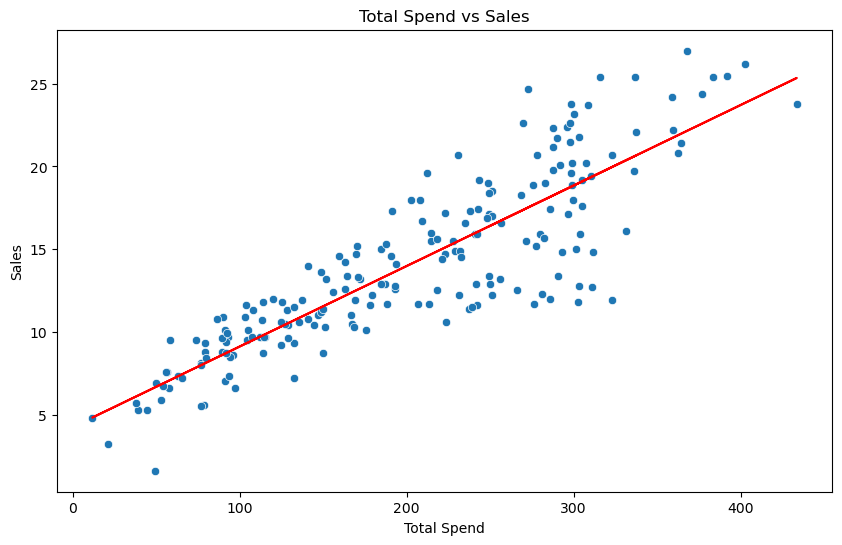

In [114]:
# 定義 x 和 y
x = df['total_spend']
y = df['sales']

# 計算 x 和 y 的平均值
x_mean = np.mean(x)
y_mean = np.mean(y)

# 計算斜率 beta_1
beta_1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)

# 計算截距 beta_0
beta_0 = y_mean - beta_1 * x_mean

# 輸出線性方程
print(f"回歸方程為：y = {beta_0:.2f} + {beta_1:.2f}x")

# 可視化
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_spend', y='sales', data=df)
plt.plot(x, beta_0 + beta_1 * x, color='red')  # 畫出回歸線
plt.title('Total Spend vs Sales')
plt.xlabel('Total Spend')
plt.ylabel('Sales')
plt.show()